# Regression Model Project
## Project Overview

This project focuses on building and validating a regression model using the provided dataset. The data was divided into two groups, referred to as "group1" and "group2." The regression model for both groups was assumed to be a polynomial function involving five variables: `time`, `var1`, `var2`, `var3`, and `var4`.

## Model Assumptions and Approach

- **Polynomial Regression Model**: The model was designed as a polynomial of the five variables mentioned above. The exponents for each variable were selected to maximize the R² (R-squared) value and minimize the p-value of the individual coefficients.

- **Ordinary Least Squares (OLS) Method**: The model was implemented using the Ordinary Least Squares (OLS) method from the `statsmodels.api` package in Python.

## Data Splitting

The dataset was split into training and testing sets to evaluate the model's performance. The number of samples in each group is summarized as follows:
- **Training Data Count**: The number of samples used for training the model.
- **Testing Data Count**: The number of samples used for testing the model.

## Results and Visualization

- **Analysis Results**: The results of the regression analysis are presented in the accompanying report.
- **Scatter Plots**: Scatter plots of predicted vs actual values (test data) are provided in the appendices. These plots include residuals that are gradually colored to visualize the model's performance.

## Python code for realization
### Importing necessary modules

In [1]:
%matplotlib inline

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tools.eval_measures import mse, rmse

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet, Lasso
from sklearn.metrics import mean_absolute_error



### Reading data

In [3]:
iDir = 'input/'
pDir = 'plots/'

fnam = 'data.csv'
df = pd.read_csv(iDir + fnam,sep=',',header=0)
print(df.head())
print(df.tail())


    group  time         var1      var2      var3      var4   dependent
0  group1     1   971.508984  0.375901  0.798304  0.000505   77.978494
1  group1     2   978.746614  0.606482  3.408306  1.438227   91.263548
2  group1     3   964.288875  0.093051  1.090679  8.442052  174.937467
3  group1     4   970.080293  0.703748  0.174558  8.229052  217.505983
4  group1     5  1003.203341  0.636575  0.719953  2.394819  208.658537
      group  time         var1      var2      var3      var4   dependent
395  group2     6  1032.505647  0.913059  1.777408  2.243348  556.749577
396  group2     7   926.838727  0.342892  2.413539  7.359040  574.942405
397  group2     8  1092.332355  0.896533  0.640897  7.379278  659.188613
398  group2     9   956.600960  0.027689  3.658717  8.462679  637.243075
399  group2    10  1015.365325  0.302600  3.149446  6.760243  658.119112


File *data.csv* contains data compound with variables *time*, *var1*, *var2*, *var3*, *var4* which will be features, and *dependent* variable which will be output of regression.

### Feature inspection
Feature inspection is carried out by plotting pairplot for each group of features. It should reveal dependance of each feature and outliers existance.

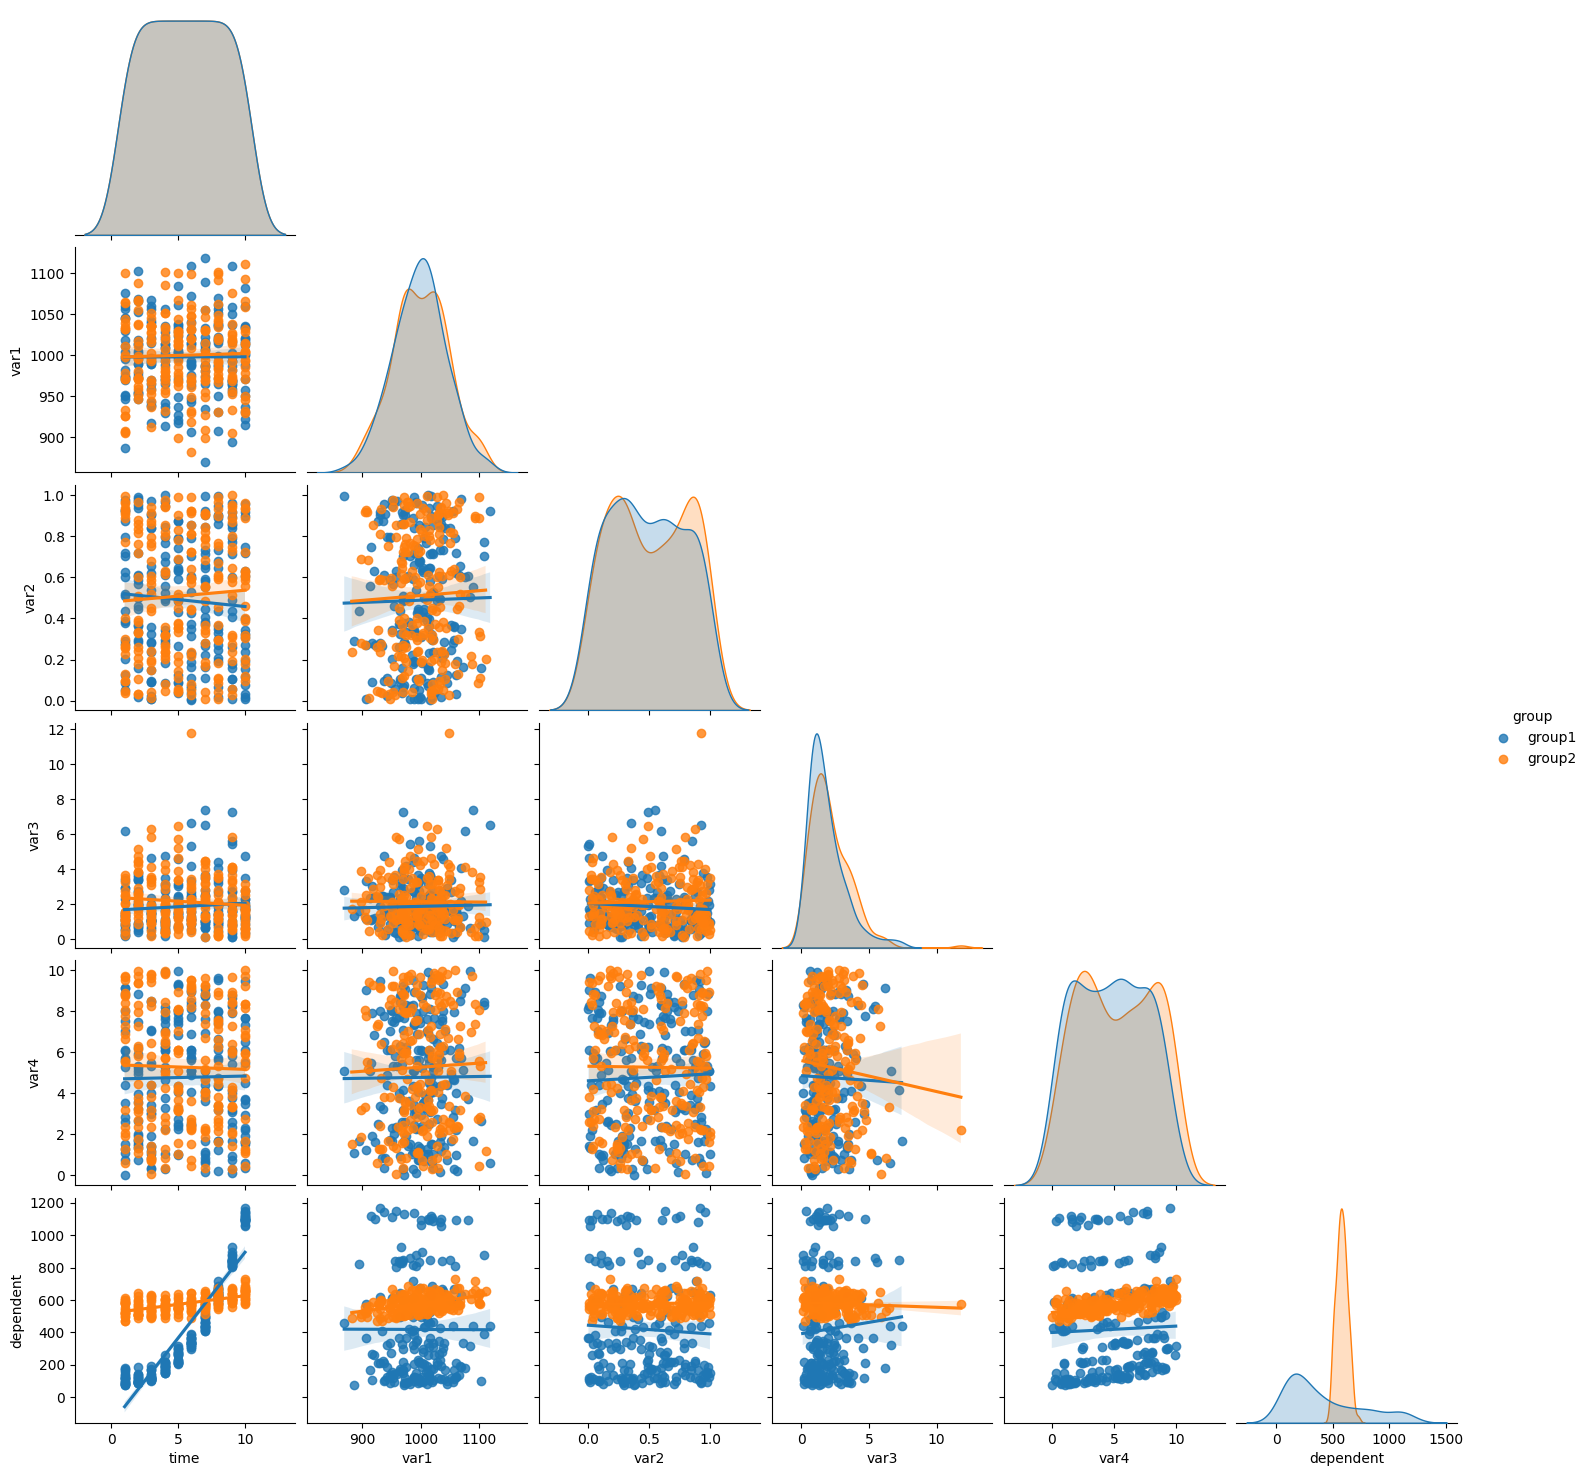

In [9]:
fig = sns.pairplot(df,kind='reg', diag_kind='kde',corner=True,hue='group',aspect=1)
fig.savefig(pDir + 'pairplot-all.png',dpi=150)

The pairplot shows the correlation and the distribution of each feature's data, as well as outliers, which are primarily visible for the feature **var3**. In the next step, the boxplots should help identify outliers in the dataset.

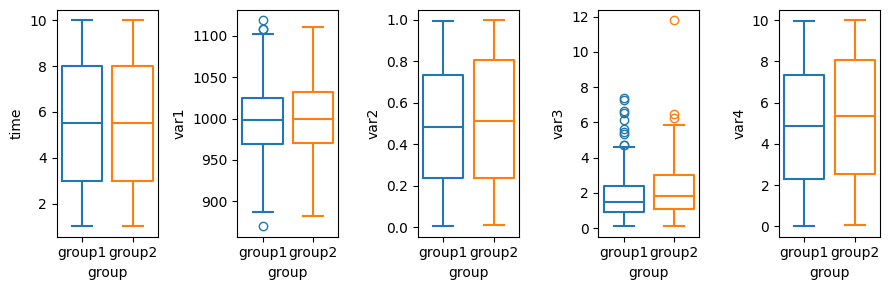

In [5]:
key = df.columns[1:-1]

def plboxp(df,key,fnam):
    fig, ax = plt.subplots(1,len(key),figsize=(9,3))
    for i,k in enumerate(key):
        sns.boxplot(data=df,y=k,x='group',hue='group',fill=False,ax=ax[i],orient='v')
    
    fig.tight_layout()
    fig.savefig(pDir + fnam + '.png',dpi=150)

plboxp(df,key,'boxplot-all')


The boxplots presented above showed two variables with outliers: **var1** and **var3**. The next step is to remove the outliers from the entire dataset and check data by boxplots again. This will obviously reduce the number of data points.

   Size of original dataset: 400
Size of dataset wo outliers: 348


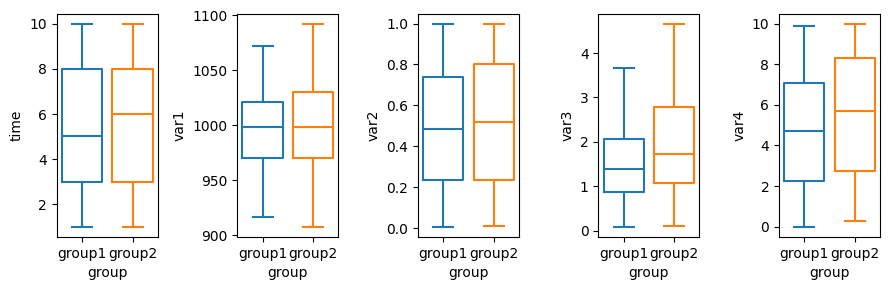

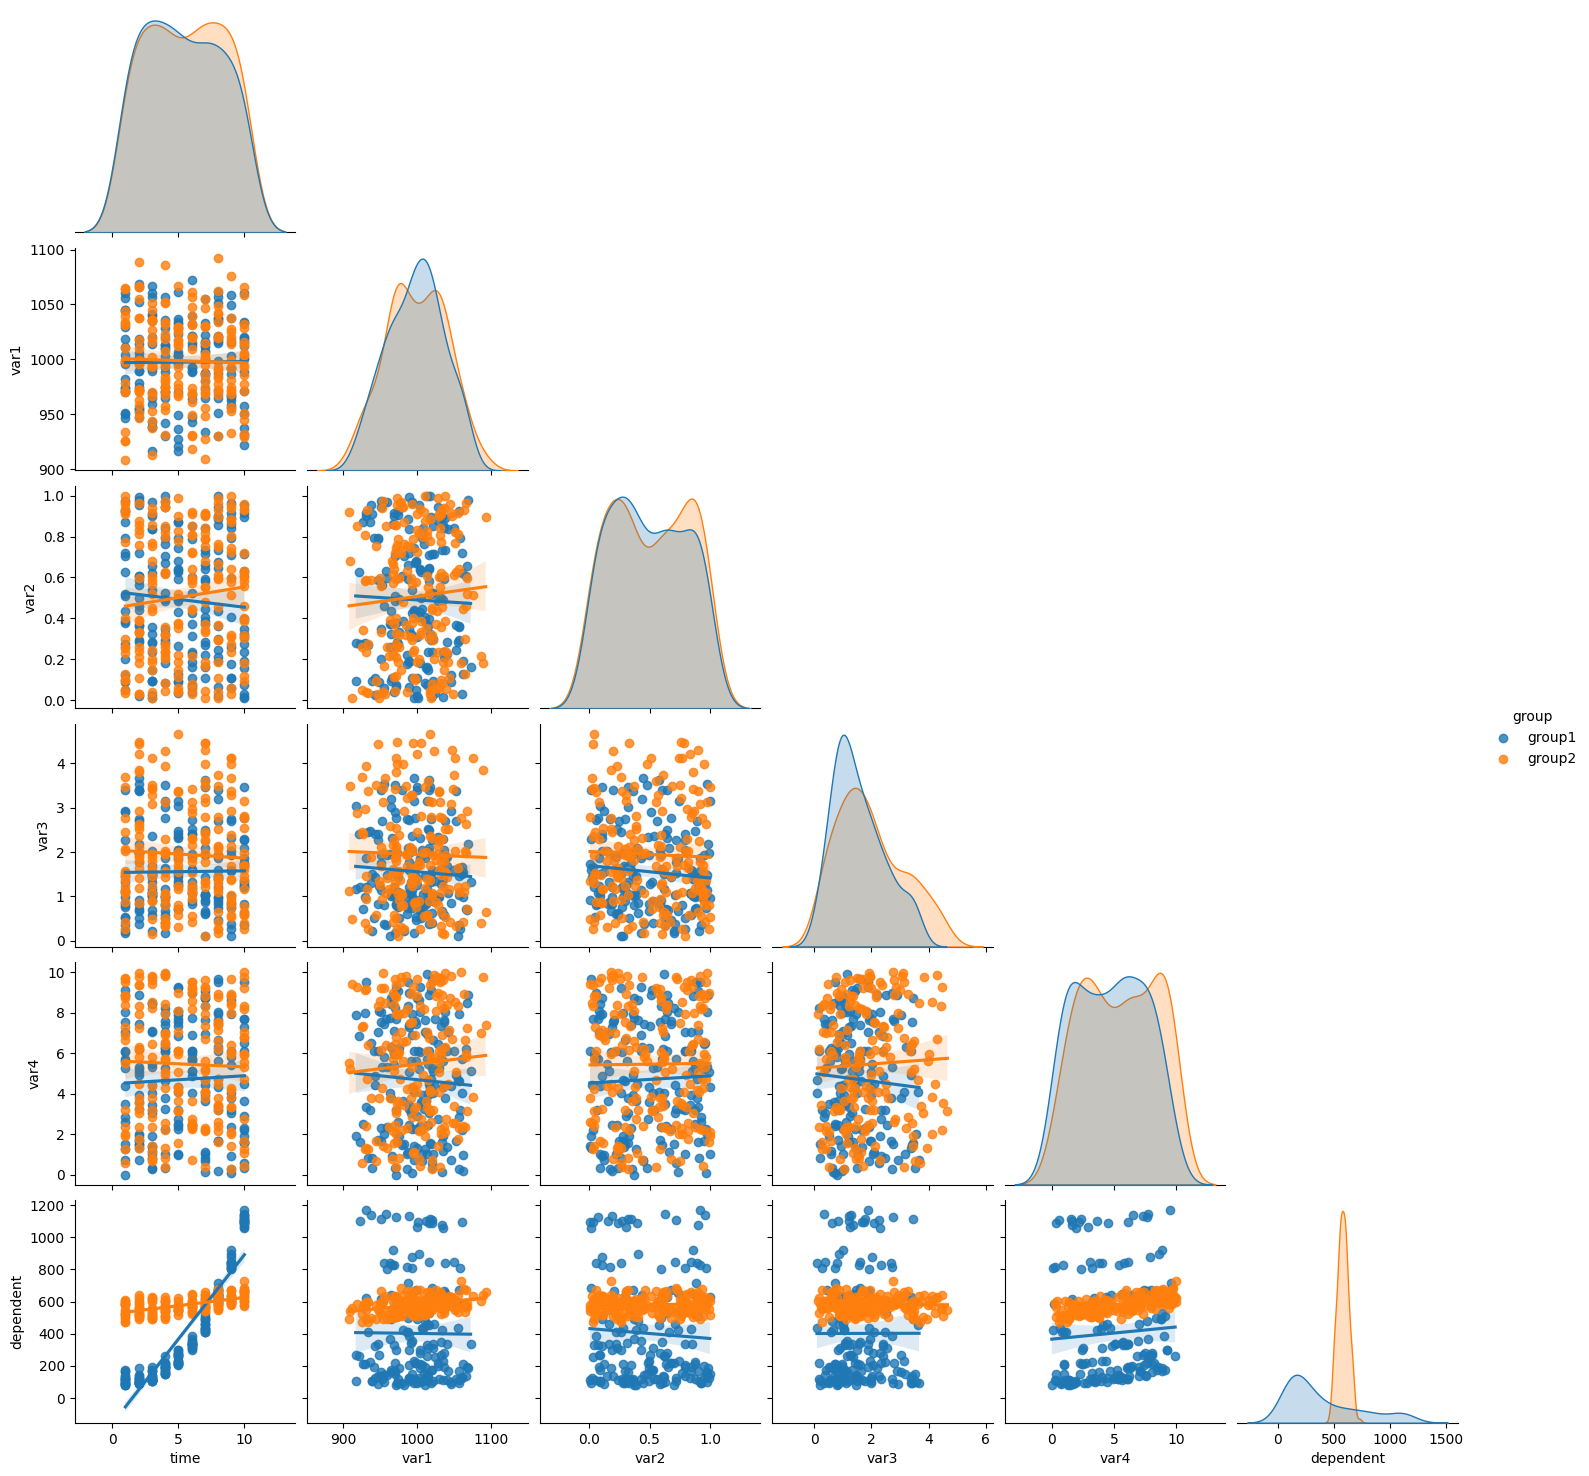

In [127]:
def outlim(ser):
    iqr = np.diff(np.percentile(ser,[25,75]))[0]
    med = np.median(ser)
    return(med-1.5*iqr,med+1.5*iqr)
dfn = pd.DataFrame()

for g in ['group1','group2']:
    kg = df.group == g
    dfi = df[kg]
    k = True
    for ke in key:
        lLim,uLim = outlim(dfi[ke])
        k1 = (dfi[ke]<=uLim) & (dfi[ke]>=lLim)
        k = k*k1

    dfn = pd.concat([dfn,dfi[k]])

print('   Size of original dataset:',df.shape[0])
print('Size of dataset wo outliers:',dfn.shape[0])
plboxp(dfn,key,'boxplot-clean')

fig = sns.pairplot(dfn,kind='reg', diag_kind='kde',corner=True,hue='group',aspect=1)
fig.savefig(pDir + 'pairplot-clean.png',dpi=150)

## Building regression model




                  group1
               Train    Test
        OLS: 0.99927 0.99861
        OLS: 0.99927 0.99861
        OLS: 0.99926 0.99860



                  group2
               Train    Test
        OLS: 0.99890 0.99925
        OLS: 0.99890 0.99925
        OLS: 0.99875 0.99871


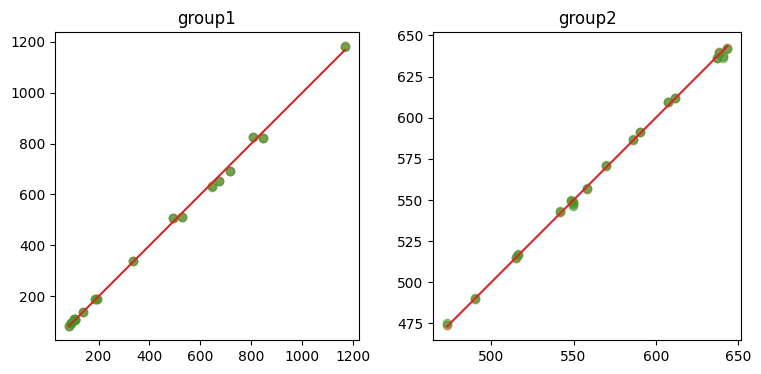

In [155]:
npow =  {'group1':[3.0,1.0,-.5,2.0,2.0],
         'group2':[2.0,1.0,1.0,1.0,2.0]}

SEED = 31113


y = dfn.dependent

X = pd.DataFrame()
fig,ax = plt.subplots(1,2,figsize=(9,4))
for i,g in enumerate(['group1','group2']):
    for ii,n in enumerate(npow[g]):
        X[key[ii]] = dfn[key[ii]]**n

    k = dfn.group == g

    X_train, X_test, y_train, y_test = train_test_split(X[k], y[k], test_size = 0.1 , random_state = SEED)
    #X_train = sm.add_constant(X_train)
    #res     = sm.OLS(y_train, X_train).fit()

    print('\n\n\n%12s%12s'%('',g))
    print('%12s%8s%8s'%('','Train','Test'))

    model = [LinearRegression(fit_intercept=True),
             Ridge(fit_intercept=True),
             ElasticNet(fit_intercept=True)]
    vpr = []
    col = ['tab:blue','tab:orange','tab:green']
    for ii,m in enumerate(model):
        m.fit(X_train,y_train)
        vpr.append(m.predict(X_test))
        print('%12s%8.5f%8.5f'%('OLS:',m.score(X_train,y_train),m.score(X_test,y_test)))
        ax[i].scatter(y_test,m.predict(X_test),c=col[ii],alpha=.5)
    
    dfr = pd.concat([y_test,pd.Series(y_lr)],axis=1,ignore_index=True)
    dfr.columns = ['Test','Prediction']
    dfr.reset_index(inplace=True,drop=True)
    
    xL = [min(y_test),max(y_test)]
    ax[i].plot(xL,xL,c='tab:red')
    ax[i].set_aspect(1)
    ax[i].set_title(g)

## Conclusion

This project applies polynomial regression using OLS to model the relationship between the dependent variable and five independent variables across two distinct groups in the dataset. The performance metrics and visualizations help in understanding the model's accuracy and predictive power.